# 1. Kiểm tra phiên bản các thư viện

In [1]:
import numpy as np
import pandas as pd
import sklearn

print("NumPy:", np.__version__)
print("Pandas:", pd.__version__)
print("Scikit-learn:", sklearn.__version__)


NumPy: 2.2.4
Pandas: 2.2.3
Scikit-learn: 1.6.1


# 2. Huấn luyện mô hình
- Sử dụng model Random Forest
- Dự báo lượng mưa trong 6 giờ tới. Sử dụng dữ liệu của 6 tiếng trước

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math


file_path = "./data.xlsx"
df = pd.read_excel(file_path)

df.head()

,i,j,AWS,CAPE,CIN,EWSS,IE,ISOR,KX,PEV,...,SLHF,SLOR,SSHF,TCLW,TCW,TCWV,U250,U850,V250,V850
0,0,114,0.0,446.125,38.875008,-641.113281,-0.000014,0.588248,37.360176,-0.000016,...,-127783,0.019673,-11962,0.723206,49.239563,48.219376,25.793488,-3.606674,4.523453,7.328094
1,0,116,0.0,624.125,79.875008,-468.113281,-0.000026,0.315002,35.903145,-0.000026,...,-207399,0.008039,28742,0.581421,48.919250,48.055313,28.781769,-2.479721,4.257828,7.910126
2,0,118,0.0,624.125,79.875008,-468.113281,-0.000026,0.315002,35.903145,-0.000026,...,-207399,0.008039,28742,0.581421,48.919250,48.055313,28.781769,-2.479721,4.257828,7.910126
3,0,119,0.0,624.125,79.875008,-468.113281,-0.000026,0.315002,35.903145,-0.000026,...,-207399,0.008039,28742,0.581421,48.919250,48.055313,28.781769,-2.479721,4.257828,7.910126
4,0,122,0.0,646.875,129.296875,-445.113281,-0.000030,0.407749,33.662910,-0.000039,...,-207719,0.002134,29126,0.420837,46.876282,46.242813,31.621613,0.049576,4.226578,7.316376


# 3. Đánh giá
- Tạo dữ liệu đầu vào với thông tin của 6 giờ trước
- Tạo cột thời gian giả định để xử lý dữ liệu dạng chuỗi thời gian
- Tạo các cột đầu vào từ 6 giừo trước
- Xoá các dòng có giá trị NaN
- Chia dữ liệu thàn tập train và test
- Khởi tạo model RandomForest
- Dự đoán trên tập test
- Đánh giá


In [ ]:
time_steps = 6

df['time'] = np.arange(len(df))

for t in range(1, time_steps + 1):
    df[f'AWS_t-{t}'] = df['AWS'].shift(t)

# Xóa các dòng có giá trị NaN
df.dropna(inplace=True)

features = [col for col in df.columns if col not in ['AWS', 'i', 'j', 'time']]
target = 'AWS'

X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

mae, rmse, r2


(0.10298412816439356, 0.442762792882309, -5.265447005080071)

In [4]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Tạo nhãn cho 6 giờ tiếp theo
df["AWS_6h"] = df["AWS"].shift(-6)

# Loại bỏ các dòng bị NaN (do dịch 6 giờ)
df.dropna(inplace=True)

# Loại bỏ các cột không cần thiết (i, j) sau khi đã xử lý NaN
X = df.drop(columns=["i", "j", "AWS", "AWS_6h"])
y = df["AWS_6h"]

# Chia tập train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện mô hình RandomForest
model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MAE: {mae:.2f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")


MAE: 0.11, MSE: 0.18, RMSE: 0.43


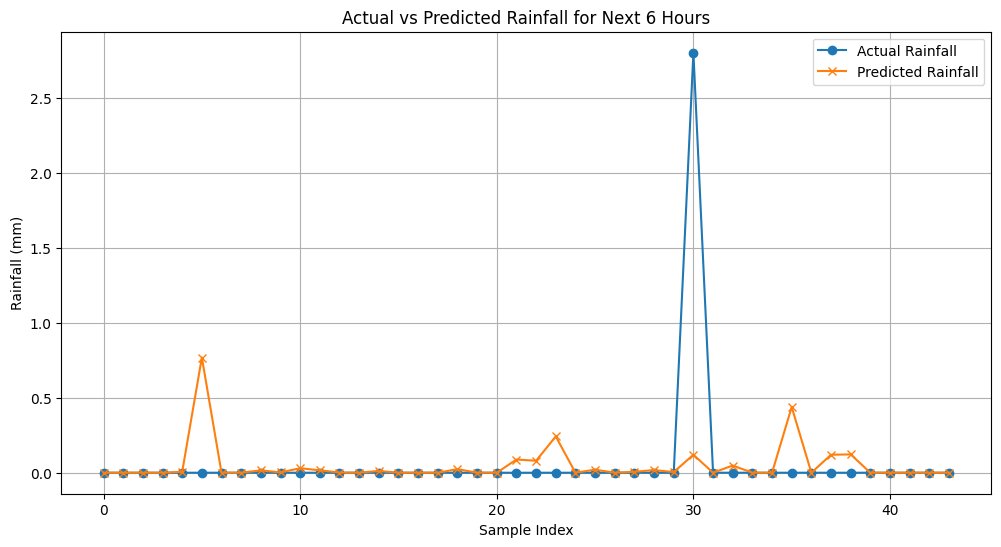

In [ ]:
import matplotlib.pyplot as plt
num_samples = 50
y_actual = y_test[:num_samples].values
y_predicted = y_pred[:num_samples]

plt.figure(figsize=(12, 6))
plt.plot(y_actual, label="Actual Rainfall", marker='o')
plt.plot(y_predicted, label="Predicted Rainfall", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Rainfall (mm)")
plt.title("Actual vs Predicted Rainfall for Next 6 Hours")
plt.legend()
plt.grid()
plt.show()
